# Import

In [1]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [3]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res
from io import BytesIO

# X=Y Test

In [6]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Test_Data_Visualization.xlsx", sheet_name="showAllCH_test")


In [7]:
df_visual

,Group,Normal Boiling Point [K] (Actual),Normal Boiling Point [K] (Predict),Unnamed: 3,Unnamed: 4,Unnamed: 5,Test Set
0,Previous Work,278.25,283.728881,NaN,NaN,NaN,NaN
1,Previous Work,293.25,303.945528,NaN,NaN,NaN,NaN
2,Previous Work,301.35,310.234528,NaN,NaN,NaN,NaN
3,Previous Work,309.05,310.234528,NaN,NaN,NaN,NaN
4,Previous Work,310.05,308.191528,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
195,This Work,471.65,470.548500,NaN,NaN,NaN,NaN
196,This Work,447.25,455.108300,NaN,NaN,NaN,NaN
197,This Work,477.35,476.940900,NaN,NaN,NaN,NaN
198,This Work,497.15,496.047450,NaN,NaN,NaN,NaN


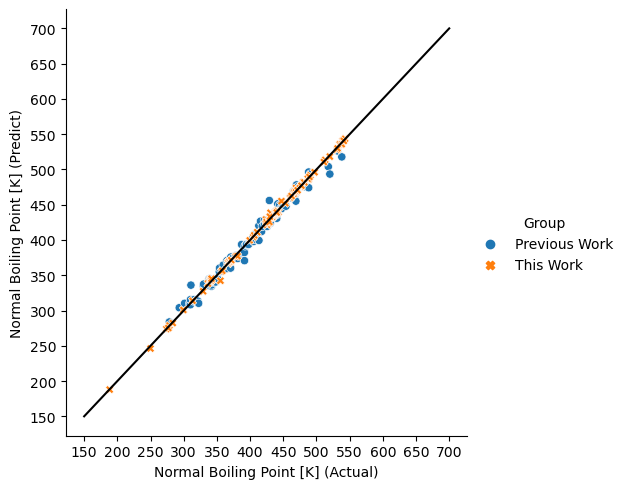

In [8]:
g= sns.relplot(
    data=df_visual, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    #col="Group", col_wrap=2,
    hue="Group",
    style="Group",
    #palette="rocket_r",
    kind="scatter", 
    #legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(150, 750, 50)
y = np.arange(150, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(150, 750, 50))
    ax.set_yticks(np.arange(150, 750, 50))
plt.show()

# X=Y All

In [4]:
df = pd.read_csv("../../[Use] Main File (Run Fingerprint)/2024-03-15 CH Fingerprint inspect.csv")


#df = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/2024-03-15/all_result.xlsx",sheet_name="Test")
df2 = df.copy()#.drop(columns={"DataType", "MAE", "RMSE", "R2"})
column_names = ["Model", "nBits","Radius", "R2"]
df3 = df2.reindex(columns=column_names)
df4 = df3[df3.Model == "XGB"]


In [5]:
df4.shape

(90, 4)

In [6]:
df4=df4.reset_index()
df5 = df4[df4["index"]%3==2]
df5.shape

(30, 5)

In [7]:
df5["nBits"] = df5["nBits"].apply(lambda x: int(x[3:]))

C:\Users\Kan\AppData\Local\Temp\ipykernel_12948\511140395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["nBits"] = df5["nBits"].apply(lambda x: int(x[3:]))


Text(0.5, 1.0, 'XGB')

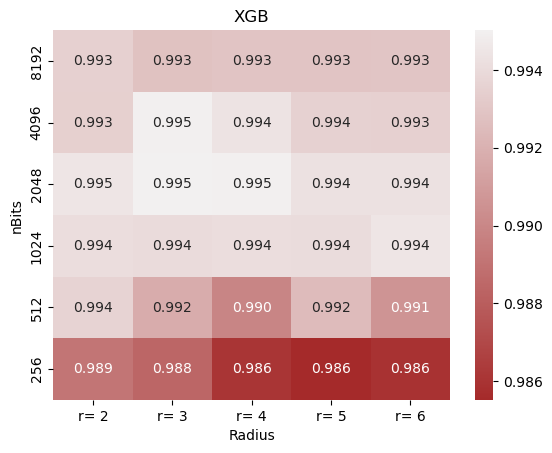

In [14]:
v_min = 0.6
v_max = 0.8

new_df = df5.pivot_table(index="nBits", columns="Radius", values="R2")
new_df.sort_index(level=1, ascending=True, inplace=True)
g = sns.heatmap(new_df,  annot=True, fmt=".3f", cmap=sns.color_palette("light:brown_r", as_cmap=True))
           #vmin=v_min ,vmax=v_max)
g.invert_yaxis()
g.get_xaxis().set_visible(True)
g.set_title("XGB")

In [11]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/CH 2024-03-15/All_Tb.xlsx", sheet_name="Model")

In [12]:
df_visual

,Model,Normal Boiling Point [K] (Actual),Normal Boiling Point [K] (Predict)
0,KNN,429.15,423.454203
1,KNN,345.65,350.770428
2,KNN,447.15,423.810155
3,KNN,386.35,372.260601
4,KNN,353.15,343.613549
...,...,...,...
219,RF,231.05,215.808680
220,RF,447.25,460.202482
221,RF,429.25,434.019683
222,RF,439.15,435.821204


In [21]:
df_visual["Model"].unique()

array(['KNN', 'XGB', 'Ridge', 'RF'], dtype=object)

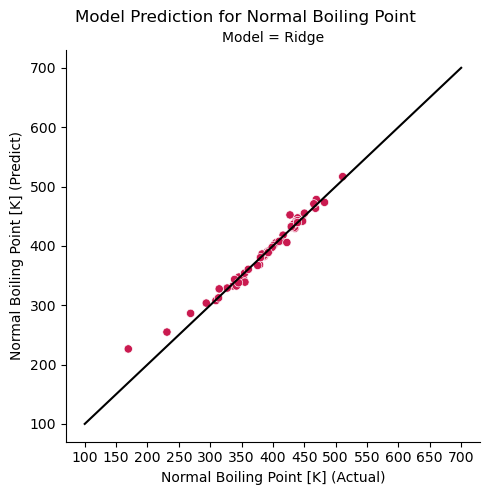

In [22]:
df_visual2 = df_visual[df_visual["Model"]=="Ridge"]
g= sns.relplot(
    data=df_visual2, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    col="Model", col_wrap=1,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(100, 750, 50)
y = np.arange(100, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(100, 750, 50))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Model Prediction for Normal Boiling Point")
plt.show()

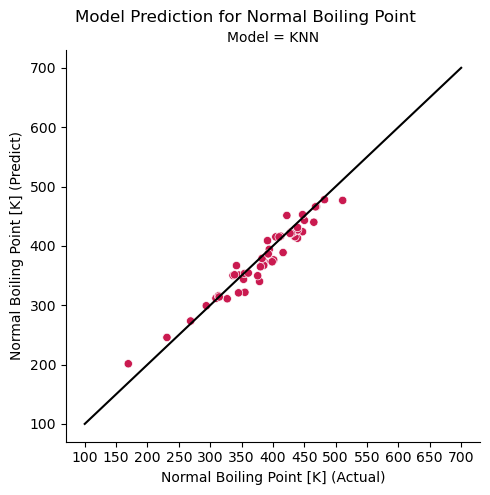

In [23]:
df_visual2 = df_visual[df_visual["Model"]=="KNN"]
g= sns.relplot(
    data=df_visual2, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    col="Model", col_wrap=1,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(100, 750, 50)
y = np.arange(100, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(100, 750, 50))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Model Prediction for Normal Boiling Point")
plt.show()

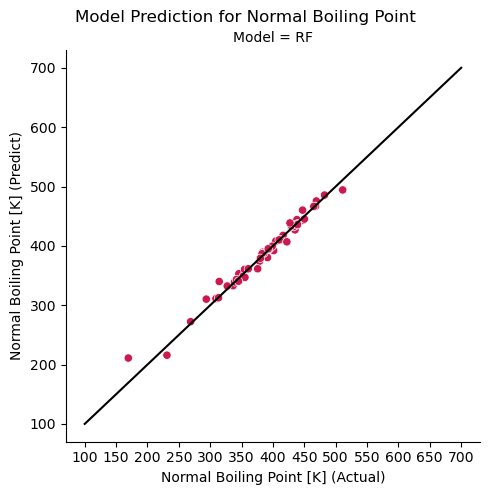

In [24]:
df_visual2 = df_visual[df_visual["Model"]=="RF"]
g= sns.relplot(
    data=df_visual2, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    col="Model", col_wrap=1,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(100, 750, 50)
y = np.arange(100, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(100, 750, 50))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Model Prediction for Normal Boiling Point")
plt.show()

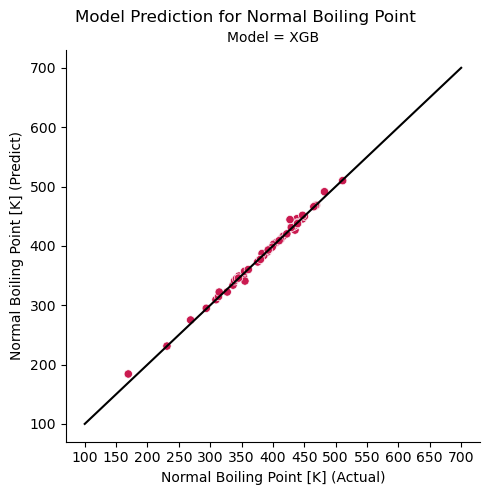

In [25]:
df_visual2 = df_visual[df_visual["Model"]=="XGB"]
g= sns.relplot(
    data=df_visual2, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    col="Model", col_wrap=1,
    hue="Model",
    #style="Model",
    palette="rocket_r",
    kind="scatter", 
    legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(100, 750, 50)
y = np.arange(100, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(100, 750, 50))
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Model Prediction for Normal Boiling Point")
plt.show()

In [68]:
df_visual = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Result & Visual/CH 2024-03-15/All_Tb.xlsx", sheet_name="export_compare")

func_name = ["MAE", "MAPE", "RMSE", "R2"]
rmse_func = lambda x,y : mean_squared_error(x,y, squared=False)
func_list = [mean_absolute_error, mean_absolute_percentage_error, rmse_func, r2_score]

def create_result_from_predict_value(table_predict, func_name, func_list):
    list_df = list()
    #name_method = pd.Series(table_predict.apply(lambda x : x.index[0], axis=1), name="Method")
    #name_method = pd.Series(table_predict.apply(lambda x : x.index, axis=1), name="Method")
    #df_1 = name_method.to_frame();   list_df.append(df_1)
    for i in range(len(func_list)):
      list_error_metric = []
      #print(table_predict)
      name_fx = func_name[i]
      func    = func_list[i]
      #value = pd.Series(table_predict.apply(lambda x : print(x[0]), axis=1),name=name_fx)
      value = pd.Series(table_predict.apply(lambda x : func(x[0], x[1]), axis=1),name=name_fx)
      df_2=value.to_frame()
      #print(df_1)
      #print(df_2)
      #df_combine = pd.merge(df_1, df_2, how='inner', left_index=True, right_index=True)
      #df_combine = pd.concat([df_1, df_2], axis=1)
      list_df.append(df_2)

    return pd.concat(list_df, axis=1)

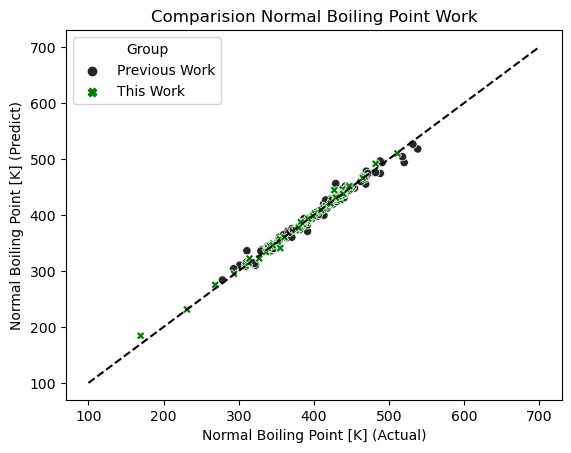

In [67]:
g= sns.scatterplot(
    data=df_visual, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    #col="Group", col_wrap=2,
    hue="Group",
    style="Group",
    #palette="dark:salmon_r",
    palette="dark:green",
    #sizes=(500, 200),
    #kind="scatter", 
    #legend=False,
    #legend="full",
    #scatter_kws={"color":"darkred","alpha":0.3,"s":200},
    #aspect=1
    
)

#plt.legend(loc='upper left')

#axes = g.fig.axes
#sns.move_legend(axes, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
x = np.arange(100, 750, 50)
y = np.arange(100, 750, 50)
g.plot(x, y,"k--")
for ax in axes:
    ax.set_xticks(np.arange(100, 750, 50))
    ax.set_yticks(np.arange(100, 750, 50))
plt.legend(loc='upper left', title='Group')
plt.title("Comparision Normal Boiling Point Work")
plt.show()

In [73]:
temp_test = df_visual.groupby(['Group']).agg({'Normal Boiling Point [K] (Actual)': lambda x: x.tolist(),
                                      'Normal Boiling Point [K] (Predict)': lambda x: x.tolist()})
temp_test

,Normal Boiling Point [K] (Actual),Normal Boiling Point [K] (Predict)
Group,,
Previous Work,"[301.35, 309.05, 322.45, 315.35, 341.85, 329.9...","[310.2345282776085, 310.2345282776085, 310.234..."
This Work,"[429.15, 345.65, 447.15, 386.35, 353.15, 404.5...","[429.09323, 349.1245, 445.37308, 385.90244, 34..."


In [74]:
test_rrr= create_result_from_predict_value(temp_test, func_name, func_list)
print(test_rrr)

                    MAE      MAPE      RMSE        R2
Group                                                
Previous Work  5.862302  0.014723  7.924389  0.982737
This Work      2.859153  0.008345  4.699539  0.994299
